In [1]:
#changer de dossier
import os
os.chdir("C:/Users/ricco/Desktop/demo")

#chargement des données
import pandas
D = pandas.read_table("fromage.txt",decimal=".")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sodium     29 non-null     float64
 1   calcium    29 non-null     float64
 2   lipides    29 non-null     float64
 3   proteines  29 non-null     float64
dtypes: float64(4)
memory usage: 1.0 KB


In [2]:
#premières lignes
D.head()

,sodium,calcium,lipides,proteines
0,353.5,72.6,26.3,21.0
1,238.0,209.8,25.1,22.6
2,112.0,259.4,33.3,26.6
3,336.0,211.1,28.9,20.2
4,314.0,215.9,19.5,23.4


<AxesSubplot:xlabel='lipides', ylabel='proteines'>

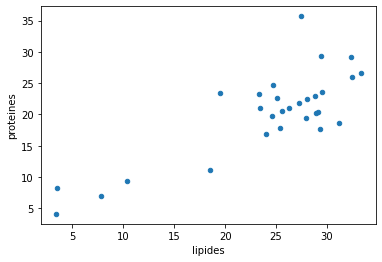

In [3]:
#nuage de points entre les 2 dernières variables
D.plot(x="lipides",y="proteines",kind="scatter")

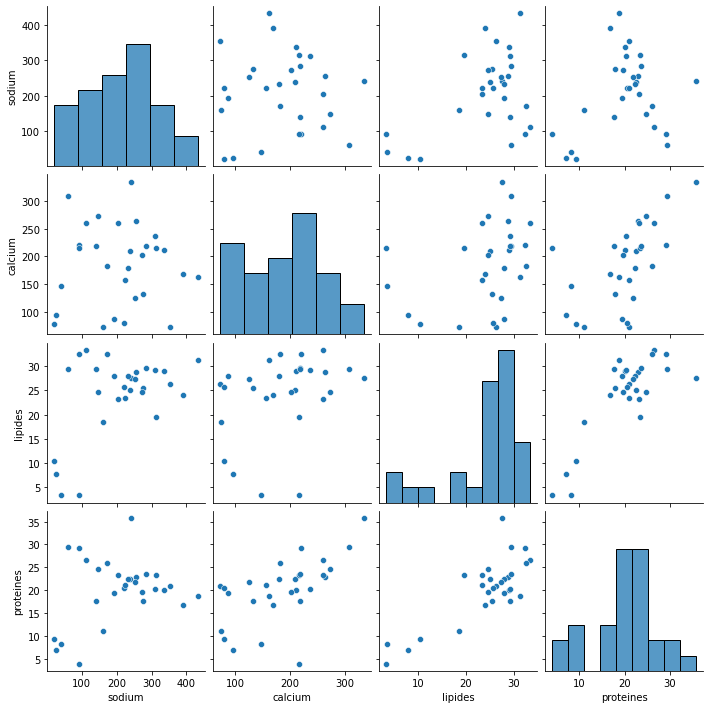

In [4]:
#nuages par paire
import seaborn as sns
sns.pairplot(D)

In [5]:
#moyennes par variable
D.mean(axis=0)

sodium       210.086207
calcium      185.734483
lipides       24.158621
proteines     20.168966
dtype: float64

In [6]:
#écarts-type par variable
D.std(axis=0)

sodium       108.678923
calcium       72.528882
lipides        8.129642
proteines      6.959788
dtype: float64

In [7]:
#standardisation
Z = (D - D.mean(axis=0))/D.std(axis=0)
print(Z)

      sodium   calcium   lipides  proteines
0   1.319610 -1.559854  0.263404   0.119405
1   0.256846  0.331806  0.115796   0.349297
2  -0.902532  1.015671  1.124450   0.924027
3   1.158585  0.349730  0.583221   0.004459
4   0.956154  0.415910 -0.573041   0.464243
5   0.422472  1.079094  0.570920   0.406770
6  -0.166419 -1.358555  0.460215  -0.096119
7   0.606500 -0.728461  0.152698  -0.340379
8  -0.350447 -0.047353  1.026045   0.837818
9  -1.086560  0.479333  1.013744   1.297602
10  0.109624 -1.468856  0.177299   0.047564
11 -0.571281  1.192153  0.066593   0.651031
12 -1.381006  1.688507  0.644724   1.326339
13 -0.460864 -1.557097 -0.696048  -1.303052
14  1.655462 -0.237622 -0.019511  -0.484062
15 -1.555833 -0.543707 -2.541148  -1.705363
16 -1.703055 -1.253769 -2.012219  -1.892150
17  0.928550  0.702693  0.607822   0.033196
18  0.689313  0.458652  0.657025   0.492980
19  0.275249  2.052500  0.411012   2.231539
20 -1.730659 -1.482644 -1.692402  -1.547312
21  0.118825 -0.400316 -0.093315

In [8]:
#vérification - moyennes
Z.mean(axis=0)

sodium       1.071939e-16
calcium      4.689735e-16
lipides      3.368953e-16
proteines    9.188053e-17
dtype: float64

In [9]:
#vérification - écarts-type
Z.std(axis=0)

sodium       1.0
calcium      1.0
lipides      1.0
proteines    1.0
dtype: float64

In [10]:
#k-means avec 2 groupes
from sklearn import cluster
res = cluster.KMeans(n_clusters=2)
res.fit(Z)

KMeans(n_clusters=2)

In [11]:
#num. de cluster affectés aux groupes
res.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0])

In [12]:
#effectifs par groupe
import numpy
numpy.unique(res.labels_,return_counts=True)

(array([0, 1]), array([ 5, 24], dtype=int64))

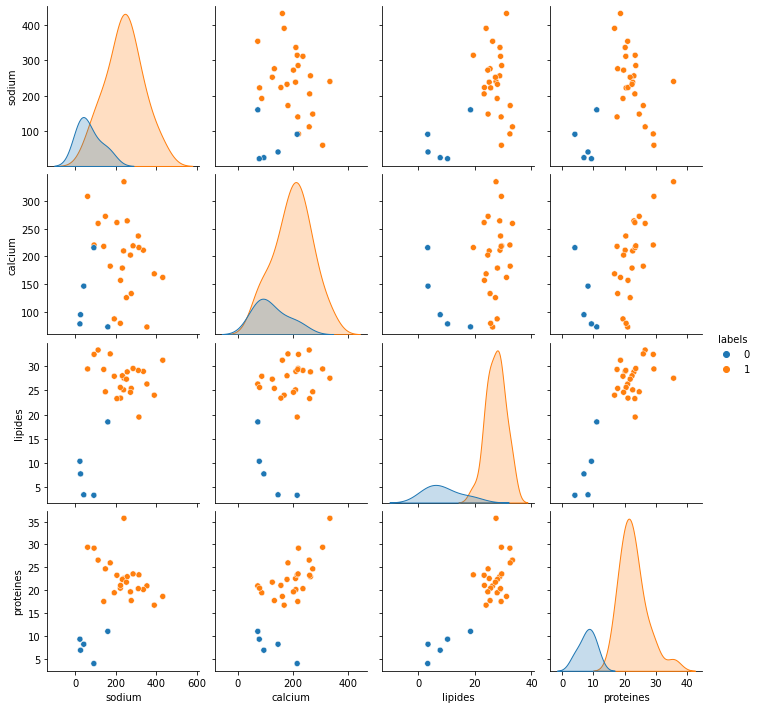

In [13]:
#rajouter la variable au data-frame initial
B = D.copy()
B['labels'] = res.labels_

#configuration des points dans le plan
#des variables prises par paires
sns.pairplot(B,hue="labels")

In [14]:
#moyennes par groupe
gb = D.groupby(res.labels_)

In [15]:
#effectifs par classe
gb.size()

0     5
1    24
dtype: int64

In [16]:
#moyennes par classe
gb.mean()

,sodium,calcium,lipides,proteines
0,67.800000,121.560000,8.720,7.980000
1,239.729167,199.104167,27.375,22.708333


In [17]:
#identification du nombre de groupes -- 1 à 10
from yellowbrick.cluster import KElbowVisualizer
coude = KElbowVisualizer(res,k=(1,10),metric='distortion',timings=False)

C:\Users\ricco\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None, timings=False)

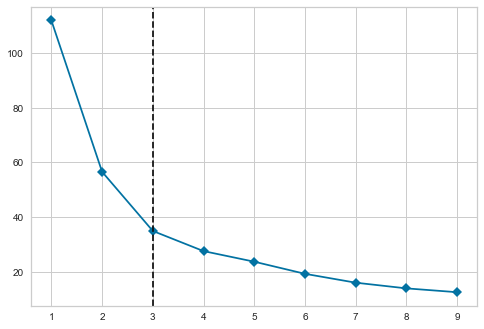

In [18]:
#calculs
coude.fit(Z)

In [19]:
#clustering en 3 classes
resBis = cluster.KMeans(n_clusters=3)
resBis.fit(Z)

KMeans(n_clusters=3)

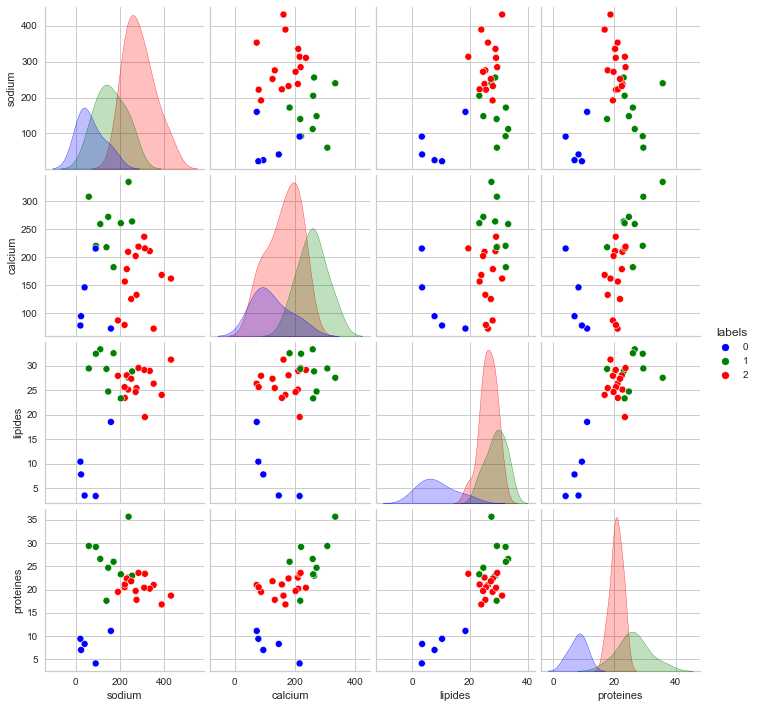

In [20]:
#graphique
B = D.copy()
B['labels'] = resBis.labels_
sns.pairplot(B,hue="labels",palette={0:'blue',1:'green',2:'red'})